In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = "https://data.humdata.org/dataset/5b184049-f8ee-4b55-a867-1409de538ff8/resource/33f303b8-4557-424e-8205-227b889f00e5/download/wfp_food_prices_turkey.csv"
TurkeyFoodPrice = pd.read_csv(url)
#remove first row because it is a header row
TurkeyFoodPrice = TurkeyFoodPrice.iloc[1:]
TurkeyFoodPrice

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
1,2013-05-15,Rice - Retail,KG,cereals and tubers,4.492,TRY,Turkey,NaN,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5,NaN
2,2013-06-15,Rice - Retail,KG,cereals and tubers,4.5786,TRY,Turkey,NaN,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5,NaN
3,2013-11-15,Rice - Retail,KG,cereals and tubers,4.7865,TRY,Turkey,NaN,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5,NaN
4,2013-12-15,Rice - Retail,KG,cereals and tubers,5.1337,TRY,Turkey,NaN,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5,NaN
5,2014-01-15,Rice - Retail,KG,cereals and tubers,5.5099,TRY,Turkey,NaN,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,2021-02-15,Cocoa (powder) - Retail,KG,miscellaneous food,68.625,TRY,Turkey,NaN,3057,Izmir,2055.0,502,15.0,5.0,7,2055_502_15_5,NaN
10480,2021-03-15,Cocoa (powder) - Retail,KG,miscellaneous food,71.231,TRY,Turkey,NaN,3057,Izmir,2055.0,502,15.0,5.0,7,2055_502_15_5,NaN
10481,2021-04-15,Cocoa (powder) - Retail,KG,miscellaneous food,73.2609,TRY,Turkey,NaN,3057,Izmir,2055.0,502,15.0,5.0,7,2055_502_15_5,NaN
10482,2021-05-15,Cocoa (powder) - Retail,KG,miscellaneous food,75.6859,TRY,Turkey,NaN,3057,Izmir,2055.0,502,15.0,5.0,7,2055_502_15_5,NaN


In [3]:
Rice_Retail = TurkeyFoodPrice[TurkeyFoodPrice["cmname"] == "Rice - Retail"]
#drop the columns which has no value
Rice_Retail=Rice_Retail.dropna(axis=1,how='all')

In [22]:
Rice_Retail_2 = Rice_Retail[["date", "price","mktname"]]

#convert price from object to numeric
Rice_Retail_2["price"] = pd.to_numeric(Rice_Retail_2["price"],errors = 'coerce')
Rice_Retail_2['year'] = pd.DatetimeIndex(Rice_Retail_2['date']).year
Rice_Retail_2

/Users/nagihan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/nagihan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,price,mktname,year
1,2013-05-15,4.4920,National Average,2013
2,2013-06-15,4.5786,National Average,2013
3,2013-11-15,4.7865,National Average,2013
4,2013-12-15,5.1337,National Average,2013
5,2014-01-15,5.5099,National Average,2014
...,...,...,...,...
8174,2021-02-15,13.2235,Izmir,2021
8175,2021-03-15,13.4700,Izmir,2021
8176,2021-04-15,13.3449,Izmir,2021
8177,2021-05-15,13.4948,Izmir,2021


In [21]:
#return to pivot table to compare National Average price with the other cities
pivot_table = pd.pivot_table(Rice_Retail_2,index="year", columns=["mktname"], values = ["price"])
pivot_table = pivot_table.dropna()
pivot_table

price                                       
mktname     Ankara   Istanbul      Izmir National Average
year                                                     
2017      6.768867   7.495025   7.508350         6.053333
2018      8.074508   9.069283   9.045750         8.372233
2019      8.563417   9.784017  10.003417         9.187408
2020     10.208900  11.622933  11.273183        10.758508
2021     11.835567  13.779917  13.349417        12.714800

No handles with labels found to put in legend.


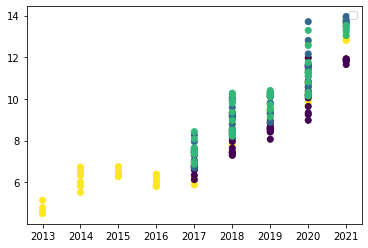

In [27]:
#we converting it into categorical data
cat_col = Rice_Retail_2['mktname'].astype('category') 

#we are getting codes for it 
cat_col = cat_col.cat.codes 

# we are using c parameter to change the color.
plt.scatter(Rice_Retail_2["year"],Rice_Retail_2["price"], c=cat_col) 
plt.legend()
